# Wasserstein GAN

## Theory

### Problem 1: Importance weighted dequantization (1pt)
Let's recall the variational lower bound for the discrete data dequantization from Lecture 7:
$$
    \log P(\mathbf{y} | \boldsymbol{\theta}) \geq  \int q(\mathbf{u} | \mathbf{y}) \log \frac{p(\mathbf{y} + \mathbf{u} | \boldsymbol{\theta})}{q(\mathbf{u} | \mathbf{y})} d \mathbf{u} = \mathcal{L}(q, \boldsymbol{\theta}).
$$
Previously we have discussed (Lecture 4, IWAE) that the variational lower bound can be improved with the help of Importance Sampling technique. Write out the lower bound for dequantization using $\mathcal{L}_k$ by analogy with the IWAE model.

$$
    \log P(\mathbf{y} | \boldsymbol{\theta}) \geq  \int q(\mathbf{u} | \mathbf{y}) \log \frac{p(\mathbf{y} + \mathbf{u} | \boldsymbol{\theta})}{q(\mathbf{u} | \mathbf{y})} d \mathbf{u} = \mathcal{L}(q, \boldsymbol{\theta}). = 
    E_{q(u|y)} \log \frac{p(\mathbf{y} + \mathbf{u} | \boldsymbol{\theta})}{q(\mathbf{u} | \mathbf{y})} ⇒ E_{u_1 ... u_k \sim q(u_k|y)} \log \cfrac{1}{K} \sum\limits_{i=1}^K  \frac{p(\mathbf{y} + \mathbf{u}_i | \boldsymbol{\theta})}{q(\mathbf{u}_i | \mathbf{y})}
$$

### Problem 2: Least Squares GAN (1pt)
    
The Vanilla GAN often suffers from problems with a vanishing gradient. [Least Squares GAN](https://arxiv.org/abs/1611.04076) tries to solve this problem by replacing the error function with the following:
$$
   	\min_D V(D) = \min_D \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - b)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - a)^2 \right]
$$
$$
   	\min_G V(G) = \min_G \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - c)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - c)^2 \right],
$$
where $a,b,c \in \mathbb{R}$ some fixed constants.

1) Write out the formula for the optimal discriminator $D^*$.
  
2) Write out the expression for the error function of the generator $V(G)$ in the case of an optimal discriminator $D^*$.
  
3) Prove that for $b - c = 1$, $b - a = 2$, the error function of the generator $V(G)$ in the case of the optimal discriminator $D^*$ takes the form:
$$
   	V(G) = \chi^2_{\text{Pearson}} \left(\frac{\pi(\mathbf{x}) + p(\mathbf{x} | \boldsymbol{\theta})}{2} || p(\mathbf{x} | \boldsymbol{\theta})\right), 
$$
where $\chi^2_{\text{Pearson}} (p || q)$ is a squared Pearson divergence:
$$
   	\chi^2_{\text{Pearson}} (p || q) = \int \frac{(p(\mathbf{x}) - q(\mathbf{x}))^2}{p(\mathbf{x})} d \mathbf{x}.
$$



1. $\cfrac{dy(D)}{dD} = \cfrac{d}{dD} (\cfrac{1}{2} \int \pi(x)(D(x)- b)^2 dx + \cfrac{1}{2} \int p(z)(D(G(z))- a)^2 dz)$

Рассмотрим по частям, так будет удобнее

$\cfrac{d}{dD} (\cfrac{1}{2} \int \pi(x)(D(x)- b)^2 dx = \pi(x)(D(x)-b)$


$\cfrac{d}{dD} \cfrac{1}{2} \int p(z)(D(G(z))- a)^2 dz = p(z)(D(G(z)) - a)$



$\pi(x)D(x) - \pi(x)b + p(z)(D(G(z))) - p(z)a = 0$

$D(x)(\pi(x) + p(z)) = p(z)a + \pi(x)b$

$D* = \cfrac{p(z)a + \pi(x)b}{\pi(x) + p(z)}$

2. $\min_G V(G) = \min_G \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (D(\mathbf{x}) - c)^2 + \mathbb{E}_{p(\mathbf{z})} (D(G(\mathbf{z})) - c)^2 \right] = \min_G \frac{1}{2}\left[ \mathbb{E}_{\pi(\mathbf{x})} (\cfrac{p(z)a + \pi(x)b}{\pi(x) + p(z)} - c)^2 + \mathbb{E}_{p(\mathbf{z})} (\cfrac{p(z)a + \pi(x)b}{\pi(x) + p(z)} - c)^2 \right]$

$= \cfrac{1}{2}( \int \pi(x) \cfrac{p(z)a + \pi(x)b -cp(z) - c\pi(x)}{\pi(x) + p(z)} dx  +   \int \pi(x) \cfrac{p(z)a + \pi(x)b -cp(z) - c\pi(x)}{\pi(x) + p(z)} dz) = \cfrac{1}{2}( \int \pi(x) \cfrac{(a-c)p(z) + (b-c)\pi(x)}{\pi(x) + p(z)} dx  +   \int p(z) \cfrac{(a-c)p(z) + (b-c)\pi(x)}{\pi(x) + p(z)} dz) = \cfrac{1}{2}\int \cfrac{((a-c)p(z) + (b-c)\pi(x))^2}{(\pi(x) + p(z))^2}(\pi(x) + p(z)) dxdz =  \cfrac{1}{2}\int \cfrac{((a-c)p(z) + (b-c)\pi(x))^2}{\pi(x) + p(z)} dxdz$


Из условия $b-c = 1, \quad b-a=2 \quad \Rightarrow a-c=-1$ 

Тогда

$\cfrac{1}{2}\int \cfrac{((a-c)p(z) + (b-c)\pi(x))^2}{\pi(x) + p(z)} dxdz = \int \cfrac{(\pi(x)-p(z))^2}{2(\pi(x) + p(z))} dxdz$$



3. $V(G) = \chi (\cfrac{\pi(x) + p(x)}{2} || p(x)) = \int  \cfrac{(\pi(x) + p(x))^2}{4} * \cfrac{2}{\pi(x) + p(x)}dx = \int \cfrac{(\pi(x)-p(x))^2}{2(\pi(x) + p(x))} dx$

### Problem 3: Gradient Penalty theorem (2pt)

In this problem your task is to partially validate the **Gradient Penalty** theorem (*similar to* [WGAN-GP](https://arxiv.org/pdf/1704.00028.pdf), *proposition 1*) from the Lecture 10. 

Recall the Waserstein GAN theoretical setup. Let $\pi$ and $p$ are two probability measures defined on $\mathbb{R}^m$. The primal and Kantorovich-Rubinstein (dual) formulations of $1$-Wasserstein distance are as follows:

$$
W(\pi \Vert p) = \inf\limits_{\gamma \in \Gamma(\pi, p)} \int \Vert \mathbf{y} - \mathbf{z} \Vert \gamma(\mathbf{y}, \mathbf{z}) d\mathbf{y} d\mathbf{z}\quad \text{(primal problem)}
$$

$$
W(\pi \Vert p) = \sup\limits_{\Vert f \Vert_L \leq 1} \left[ \int f(\mathbf{x}) \pi(\mathbf{x}) d\mathbf{x} - \int f(\mathbf{x}) p(\mathbf{x}) d\mathbf{x}\right] \quad \text{(dual problem)}
$$

Let there exist $\gamma^* \in \arg\inf\limits_{\gamma \in \Gamma(\pi, p)} \int \Vert \mathbf{y} - \mathbf{z} \Vert \gamma(\mathbf{y}, \mathbf{z}) d\mathbf{y} d\mathbf{z}$ and $f^* \in \arg\sup\limits_{\Vert f \Vert_L \leq 1} \left[ \int f(\mathbf{x}) \pi(\mathbf{x}) d\mathbf{x} - \int f(\mathbf{x}) p(\mathbf{x}) d\mathbf{x}\right]$.

Let $f^*$ is differentiable, $\gamma^*(\{ \mathbf{y} = \mathbf{z}\}) = 0$. Let $t \in [0, 1]$. Prove, that $\mathbb{P}_{(\mathbf{y}, \mathbf{z}) \sim \gamma^*} \left[\Vert \nabla f^*(\mathbf{x})\big{|}_{\mathbf{x} = t \mathbf{y} + (1 - t)\mathbf{z}}\Vert = 1
\right]= 1$.

**Hint 1**: Use the statement from the Seminar 10: 
$$
\mathbb{P}_{(\mathbf{y}, \mathbf{z}) \sim \gamma^*} \left[f^*(\mathbf{y}) - f^*(\mathbf{z}) = \Vert \mathbf{y} - \mathbf{z} \Vert\right] = 1.
$$

**Hint 2**: Note, that $f^*$ is 1-Lipshitz.

1. Let $(\mathbf{y}, \mathbf{z}) \sim \gamma^*$. Given $t \in [0, 1]$ define $\mathbf{x}_t = t \mathbf{y} + (1 - t)\mathbf{z}$. Prove, that 
$$
\mathbb{P}_{(\mathbf{y}, \mathbf{z}) \sim \gamma^*} \Big{[}\sup\limits_{t \in [0, 1]} \big{|} f^*(\mathbf{x}_t) - f^*(\mathbf{z}) - t \Vert \mathbf{y} - \mathbf{z} \Vert\big{|} = 0\Big{]} = 1.
$$

2. Let $(\mathbf{y}, \mathbf{z}) \sim \gamma^*$. Define the function $\phi(t) : [0, 1] \rightarrow \mathbb{R}$, $\phi(t) = f^*(x_t)$. By considering $\nabla_t \phi(t)$ prove, that:
$$
\forall t \in [0, 1] \text{ : }\mathbb{P}_{(\mathbf{y}, \mathbf{z}) \sim \gamma^*} \big{[}\langle \nabla f^*(\mathbf{x})\big{|}_{\mathbf{x} = \mathbf{x}_t}, \mathbf{y} - \mathbf{z}\rangle = \Vert \mathbf{y} - \mathbf{z} \Vert\big{]} = 1.
$$

The $\langle \cdot , \cdot \rangle$ is scalar product.

3. Prove, that $\forall t \in [0, 1]$: 
$$
\mathbb{P}_{(\mathbf{y}, \mathbf{z}) \sim \gamma^*} \big{[}\nabla f^*(\mathbf{x})\big{|}_{\mathbf{x} = \mathbf{x}_t} = \frac{\mathbf{y} - \mathbf{z}}{\Vert \mathbf{y} - \mathbf{z} \Vert}\big{]} = 1.
$$

1. Заметим что 
$t||y-z|| = \sqrt{t(y-z)^T t(y-z)} = ||t(y-z)|| = ||ty+z - tz - z|| = ||ty + (1-t)z - z|| = ||x_t - z||$

Пользуясь этим знанием, а также утверждением с семинара получим

$sup_t (f^*(x_t) - f^*(z) - t||y-z||) = sup_t (f^*(x_t) - f^*(z) - ||x_t-z||) = sup_t (f^*(x_t) - f^*(z) - f^*(x_t) +f^*(z)) = 0$

2. Заметим, что $\phi(0) = f^*(z)$

Тогда из 1 пункта видно, что  $f^*(x_t) = f^*(z) + t||y-z|| \Rightarrow \phi(t) = \phi(0) + t||y-z|| \Rightarrow \nabla_t \phi(t) = ||y-z||$

А также увидим, что из равенства функций и чейн рула будет следовать $\nabla_t \phi(t) = <\nabla(f^*(x_t)), \nabla x_t> = <\nabla(f^*(x_t)), y-z> = ||y-z||$, что и требовалось доказать

3. Подставив значение для градиента функции f в то что мы получили выше, получим равенство, а также можем показать, что разность будет давать 0, что будет означать равенство функции и данного выражения, так как $y \neq z$


3.1 $<\nabla f^*(x_t), y-z> = \cfrac{(y-z)^T}{||y-z||} (y-z) = ||y-z||$

3.2 $<\nabla f^*(x_t) - \cfrac{(y-z)}{||y-z||}, y-z> = (\nabla f^*(x_t) - \cfrac{(y-z)}{||y-z||})^T (y-z) = \nabla f^*(x_t)^T(y-z) - \cfrac{(y-z)^T}{||y-z||}(y-z) = ||y-z|| - ||y-z|| = 0$

In [1]:
REPO_NAME = "2022-2023-DGM-AIMasters-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

Cloning into '2022-2023-DGM-AIMasters-course'...
remote: Enumerating objects: 1184, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 1184 (delta 52), reused 145 (delta 50), pack-reused 1036
Receiving objects: 100% (1184/1184), 551.67 MiB | 17.56 MiB/s, done.
Resolving deltas: 100% (455/455), done.
Checking out files: 100% (399/399), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./2022-2023-DGM-AIMasters-course/homeworks
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for dgm-utils: filename=dg

In [2]:
from dgm_utils import show_samples, visualize_images, load_pickle

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from functools import partial
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.autograd import Variable

USE_CUDA = torch.cuda.is_available()

print("cuda is available:", USE_CUDA)

cuda is available: True


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# do not change this function
def plot_losses(losses, title):
    n_itr = len(losses)
    xs = np.arange(n_itr)

    plt.figure(figsize=(7, 5))
    plt.plot(xs, losses)
    plt.title(title, fontsize=14)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Loss", fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

## Task 2: Wasserstein GANs for CIFAR 10 

In this task we will fit different kinds of Wasserstein GANs (different ways to enforce Lipschitzness) to the CIFAR10 dataset
* [WGAN](https://arxiv.org/abs/1701.07875) - standard Wasserstein GAN with weight clipping;
* [WGAN-GP](https://arxiv.org/pdf/1704.00028.pdf) - Wasserstein GAN with Gradient Penalty;
* [SN-GAN](https://arxiv.org/pdf/1802.05957.pdf) - Wasserstein GAN with Spectral Normalization.


Download the data from [here](https://drive.google.com/file/d/1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj/view?usp=sharing) (you could use the cell below).

In [7]:
!gdown --id 1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FZcV8Mm91fiXm2jFnB0jvK5ROyHdJFvj
To: /content/cifar10.pkl
100% 185M/185M [00:04<00:00, 39.1MB/s]


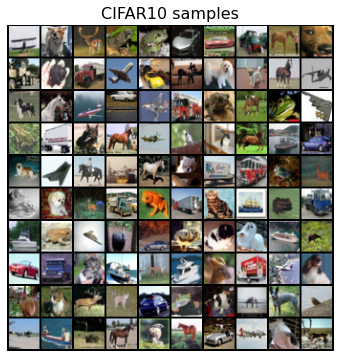

In [8]:
train_data, test_data = load_pickle("cifar10.pkl")

visualize_images(train_data, "CIFAR10 samples")

### Problem 1: WGAN 

[WGAN](https://arxiv.org/abs/1701.07875) model uses weight clipping to enforce Lipschitzness of the critic.

The model objective is
$$
\min_{G} W(\pi || p) \approx \min_{G} \max_{\boldsymbol{\phi} \in \boldsymbol{\Phi}} \left[ \mathbb{E}_{\pi(\mathbf{x})} f(\mathbf{x}, \boldsymbol{\phi})  - \mathbb{E}_{p(\mathbf{z})} f(G(\mathbf{z}, \boldsymbol{\theta}), \boldsymbol{\phi} )\right].
$$
Here $f(\mathbf{x}, \boldsymbol{\phi})$ is the critic model. The critic weights $\boldsymbol{\phi}$ should lie in the compact set $\boldsymbol{\Phi} = [-c, c]^d$.

In this task we will use fully-connected networks for the generator $G(\mathbf{z}, \boldsymbol{\theta})$ and the critic $f(\mathbf{x}, \boldsymbol{\phi})$.

In [9]:
class ConvGenerator(nn.Module):
    def __init__(self, input_size=128, n_channels=64):
        super().__init__()
        self.n_channels = n_channels
        self.input_size = input_size

        self.linear = nn.Linear(self.input_size, 4 * 4 * 4 * self.n_channels)
        self.relu = nn.ReLU()
        self.tconv1 = nn.ConvTranspose2d(
            self.n_channels, self.n_channels, kernel_size=2, stride=2
        )
        self.bn1 = nn.BatchNorm2d(self.n_channels)
        self.relu1 = nn.ReLU()
        self.tconv2 = nn.ConvTranspose2d(self.n_channels, 3, kernel_size=2, stride=2)
        self.bn2 = nn.BatchNorm2d(3)
        self.relu2 = nn.ReLU()
        self.activation = nn.Tanh()

        self.net = nn.Sequential(
            self.tconv1,
            self.bn1,
            self.relu1,
            self.tconv2,
            self.bn2,
            self.relu2,
            self.activation,
        )

        # ====

    def forward(self, input):
        # ====

        bs = input.size()[0]

        out = self.relu(self.linear(input))

        # out = out_lin.resize(bs, self.n_channels, 8, 8)
        output = self.net(out.view(bs, self.n_channels, 8, 8))

        # ====
        return output  # output.view(-1, 3, 32, 32)

    def sample(self, n_samples):
        # ====

        samples = Variable(
            torch.Tensor(np.random.normal(0, 1, (n_samples, self.input_size)))
        )

        out = self.forward(samples.cuda())

        return out
        # ====

Now it is time to define our critic. Here we will use the same class for all WGAN models, but the arguments will depend on the WGAN mode.

In [10]:
class ConvCritic(nn.Module):
    def __init__(self, n_channels, conv_layer=None, linear_layer=None, clip_c=None):
        super().__init__()
        self.n_channels = n_channels
        self.conv_layer = conv_layer or nn.Conv2d
        self.linear_layer = linear_layer or nn.Linear
        self.clip_c = clip_c

        self.linear_dim = self.n_channels * 32 * 32

        # ====

        self.conv1 = self.conv_layer(3, self.n_channels, kernel_size=3, padding=1)
        self.lrelu1 = nn.LeakyReLU()

        self.conv2 = self.conv_layer(
            self.n_channels, self.n_channels, kernel_size=3, padding=1
        )
        self.lrelu2 = nn.LeakyReLU()

        self.conv3 = self.conv_layer(
            self.n_channels, self.n_channels, kernel_size=3, padding=1
        )
        self.lrelu3 = nn.LeakyReLU()

        self.linear = self.linear_layer(self.linear_dim, 1)

        self.conv_net = nn.Sequential(
            self.conv1,
            self.lrelu1,
            self.conv2,
            self.lrelu2,
            self.conv3,
            self.lrelu3,
            nn.Flatten(),
            self.linear,
        )

        # ====

    def clip_weights(self):
        for layer in self.conv_net:
            if isinstance(layer, nn.Linear) or isinstance(layer, nn.Conv2d):
                # ====
                layer.weight.data.clamp_(-self.clip_c, self.clip_c)

    def forward(self, x):
        # ====

        if self.clip_c is not None:
            self.clip_weights()

        output = self.conv_net(x)

        # ====
        return output

In [11]:
def train_wgan(
    generator,
    critic,
    train_loader,
    critic_steps,
    batch_size,
    n_epochs,
    lr,
    use_cuda=False,
    gp_weight=None,
):
    if use_cuda:
        critic = critic.cuda()
        generator = generator.cuda()
    critic.train()
    generator.train()

    gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0, 0.9))
    critic_optimizer = torch.optim.Adam(critic.parameters(), lr=lr, betas=(0, 0.9))

    curr_iter = 0
    # d_loss, g_loss = torch.zeros(1), torch.zeros(1)
    batch_loss_history = {"discriminator_losses": [], "generator_losses": []}
    for epoch_i in tqdm(range(n_epochs)):
        for batch_i, x in enumerate(train_loader):
            curr_iter += 1
            if use_cuda:
                x = x.cuda()

            x.requires_grad = True
            critic_optimizer.zero_grad()

            # fake_data = generator(z).detach()
            fake_data = generator.sample(x.shape[0]).detach()

            d_loss = torch.mean(critic(fake_data)) - torch.mean(critic(x))

            if gp_weight is not None:
                gp = gradient_penalty(critic, x, fake_data)
                d_loss += gp_weight * gp

            d_loss.backward()
            critic_optimizer.step()

            # generator update
            if curr_iter % critic_steps == 0:
                gen_optimizer.zero_grad()
                fake_data = generator.sample(x.shape[0])

                g_loss = -torch.mean(critic(fake_data))

                # ====
                g_loss.backward()
                gen_optimizer.step()

                batch_loss_history["generator_losses"].append(g_loss.data.cpu().numpy())
                batch_loss_history["discriminator_losses"].append(
                    d_loss.data.cpu().numpy()
                )

    return batch_loss_history

  0%|          | 0/30 [00:00<?, ?it/s]

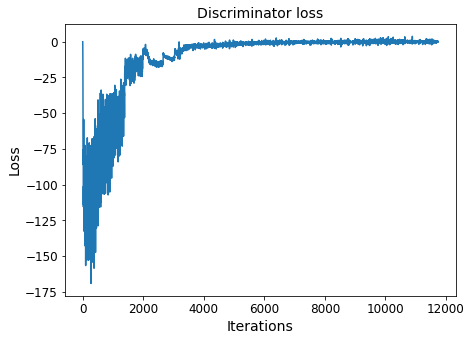

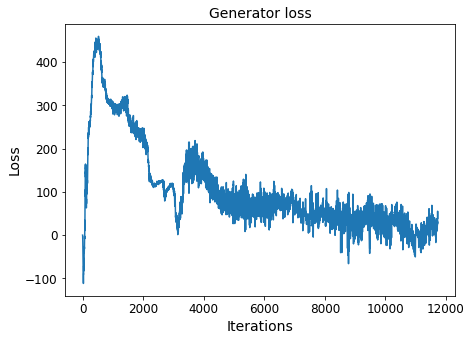

In [ ]:
BATCH_SIZE = 64  # any adequate value
N_CHANNELS = 128  # > 32
N_EPOCHS = 30  # > 10
CRITIC_STEPS = 2  # > 2
CLIP_C = 0.01  # < 1
LR = 3e-4  # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

generator = ConvGenerator(n_channels=N_CHANNELS)
critic = ConvCritic(n_channels=N_CHANNELS, clip_c=CLIP_C)

train_losses = train_wgan(
    generator,
    critic,
    train_loader,
    critic_steps=CRITIC_STEPS,
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    lr=LR,
    use_cuda=USE_CUDA,
)

plot_losses(train_losses["discriminator_losses"], "Discriminator loss")
plot_losses(train_losses["generator_losses"], "Generator loss")

Let sample from our model and draw the samples.

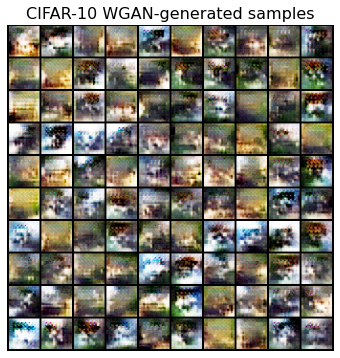

In [ ]:
generator.eval()
critic.eval()
with torch.no_grad():
    samples = generator.sample(1000)
    samples = samples.cpu().detach().numpy()


show_samples(samples[:100], title="CIFAR-10 WGAN-generated samples")

### Problem 2: WGAN-GP for CIFAR 10 (3pt)

[WGAN-GP](https://arxiv.org/pdf/1704.00028.pdf)  model uses gradient penalty to enforce Lipschitzness.

The model objective is
$$
    W(\pi || p) = \underbrace{\mathbb{E}_{\pi(\mathbf{x})} f(\mathbf{x})  - \mathbb{E}_{p(\mathbf{x} | \boldsymbol{\theta})} f(\mathbf{x})}_{\text{original critic loss}} + \lambda \underbrace{\mathbb{E}_{U[0, 1]} \left[ \left( \| \nabla_{\hat{\mathbf{x}}} f(\hat{\mathbf{x}}) \|_2 - 1 \right) ^ 2\right]}_{\text{gradient penalty}},
$$
where the samples $\hat{\mathbf{x}}_t = t \mathbf{x} + (1 - t) \mathbf{y}$ with $t \in [0, 1]$ are uniformly sampled along straight lines between pairs of points: $\mathbf{x}$ from the data distribution $\pi(\mathbf{x})$ and $\mathbf{y}$ from the generator distribution $p(\mathbf{x} | \boldsymbol{\theta}))$.

Let define our gradient penalty loss.

In [ ]:
def gradient_penalty(critic, real_data, fake_data):
    batch_size = real_data.shape[0]

    t = torch.tensor(np.random.uniform(0, 1))

    x_t = t * real_data + (1 - t) * fake_data

    d_output = critic(x_t)

    # ====
    gradients = torch.autograd.grad(
        outputs=d_output,
        inputs=x_t,
        grad_outputs=torch.ones(d_output.size()).to(fake_data.device),
        create_graph=True,
        retain_graph=True,
    )[0]

    gradients = gradients.reshape(batch_size, -1)

    gradients_norm = torch.linalg.norm(gradients, ord=2, dim=1)

    # ====
    return ((gradients_norm - 1) ** 2).mean()


def test_gradient_penalty():
    x = np.random.normal(size=(10, 4))
    x_norm = np.mean(np.sqrt(x**2))
    x = torch.randn(size=(10, 4))
    x.requires_grad = True
    assert gradient_penalty(lambda x: x, x, x).numpy() == 1
    assert gradient_penalty(lambda x: x * 0, x, x).numpy() == 1


test_gradient_penalty()

  0%|          | 0/20 [00:00<?, ?it/s]

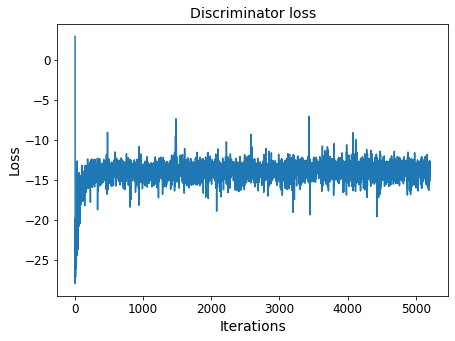

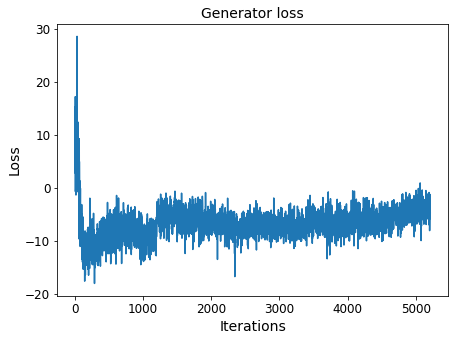

In [ ]:
BATCH_SIZE = 64  # any adequate value
N_CHANNELS = 128  # > 32
N_EPOCHS = 20  # > 10
CRITIC_STEPS = 3  # > 2
GP_WEIGHT = 9  # > 5
LR = 3e-4  # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

generator = ConvGenerator(n_channels=N_CHANNELS)
critic = ConvCritic(n_channels=N_CHANNELS)

train_losses = train_wgan(
    generator,
    critic,
    train_loader,
    critic_steps=CRITIC_STEPS,
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    lr=LR,
    gp_weight=GP_WEIGHT,
    use_cuda=USE_CUDA,
)

plot_losses(train_losses["discriminator_losses"], "Discriminator loss")
plot_losses(train_losses["generator_losses"], "Generator loss")

Let sample from our model and draw the samples.

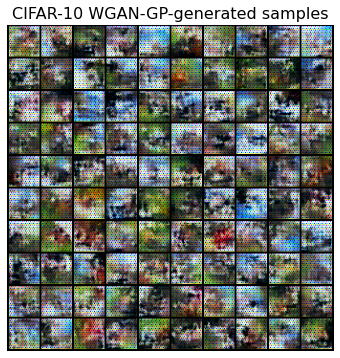

In [ ]:
generator.eval()
critic.eval()
with torch.no_grad():
    samples = generator.sample(1000)
    samples = samples.cpu().detach().numpy()


show_samples(samples[:100], title="CIFAR-10 WGAN-GP-generated samples")

### Problem 3: SN-GAN on CIFAR10 (3pt)

[Spectral Normalization GAN](https://arxiv.org/pdf/1802.05957.pdf) replaces the weights in the critic $f(\mathbf{x}, \boldsymbol{\phi})$ by 
$$
    \mathbf{W}^{SN} = \frac{\mathbf{W}}{\|\mathbf{W}\|_2}.
$$

This ensures that $\| f\|_L \leq 1.$.

Power iteration method allows to efficiently compute $\| \mathbf{W} \|_2 = \sqrt{\lambda_{\text{max}}(\mathbf{W}^T \mathbf{W})}$.
    
The pseudocode of the method is:
* $\mathbf{u}_0$ -- random vector.
* for $k = 0, \dots, n - 1$: 
$$
    \mathbf{v}_{k+1} = \frac{\mathbf{W}^T \mathbf{u}_{k}}{\| \mathbf{W}^T \mathbf{u}_{k} \|}, \quad \mathbf{u}_{k+1} = \frac{\mathbf{W} \mathbf{v}_{k+1}}{\| \mathbf{W} \mathbf{v}_{k+1} \|}.
$$
* approximate the spectral norm
$$
    \| \mathbf{W} \|_2 = \sqrt{\lambda_{\text{max}}(\mathbf{W}^T \mathbf{W})} \approx \mathbf{u}_{n}^T \mathbf{W} \mathbf{v}_{n}.
$$


In [ ]:
def power_iteration_method(W, n_iters, u_init=None, v_init=None):
    if u_init is None:
        u_init = nn.Parameter(torch.randn(W.shape[0]), requires_grad=False)
    if v_init is None:
        v_init = nn.Parameter(torch.randn(W.shape[1]), requires_grad=False)

    if W.get_device() == 0:
        v_init = v_init.cuda()
        u_init = u_init.cuda()

    for i in range(n_iters):
        v_init = W.T @ u_init
        v_init = v_init / v_init.norm(dim=0, p=2)

        u_init = W @ v_init
        u_init = u_init / u_init.norm(dim=0, p=2)

    sigma = u_init.T @ W @ v_init

    return sigma, u_init, v_init


def test_power_iteration_method():
    W = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]], dtype=np.float32)
    U, S, V = np.linalg.svd(W)
    W_tensor = torch.tensor(W)
    sigma, u, v = power_iteration_method(W_tensor, n_iters=10)
    np.allclose(S[0], sigma)
    np.allclose(u, U[:, 0])
    np.allclose(v, V[0, :])


test_power_iteration_method()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)


In [13]:
class SpectralNormConv2D(nn.Conv2d):
    def __init__(self, *args, **kwargs):
        self.power_iterations = kwargs.pop("power_iterations")
        super().__init__(*args, **kwargs)
        self.u = nn.Parameter(torch.randn(self.weight.shape[0]), requires_grad=False)
        self.v = nn.Parameter(torch.randn(self.weight.shape[1]), requires_grad=False)

    def forward(self, input):
        # print(self.weight.shape)
        W = self.weight.view(self.weight.shape[0], -1)
        with torch.no_grad():
            sigma, u, v = power_iteration_method(
                W, n_iters=self.power_iterations, u_init=self.u, v_init=self.v
            )

            # ====
        self.u.data = u.data
        self.v.data = v.data
        self.weight.data = self.weight.data / sigma

        return super().forward(input)


class SpectralNormLinear(nn.Linear):
    def __init__(self, *args, **kwargs):
        self.power_iterations = kwargs.pop("power_iterations")
        super().__init__(*args, **kwargs)

        self.u = nn.Parameter(torch.randn(self.weight.shape[0]), requires_grad=False)
        self.v = nn.Parameter(torch.randn(self.weight.shape[1]), requires_grad=False)

    def forward(self, input):
        W = self.weight.view(self.weight.shape[0], -1)
        with torch.no_grad():
            sigma, u, v = power_iteration_method(
                W, n_iters=self.power_iterations, u_init=self.u, v_init=self.v
            )

            # ====
        self.u.data = u.data
        self.v.data = v.data
        self.weight.data = self.weight.data / sigma

        return super().forward(input)

Total number of epochs: 30


  0%|          | 0/30 [00:00<?, ?it/s]

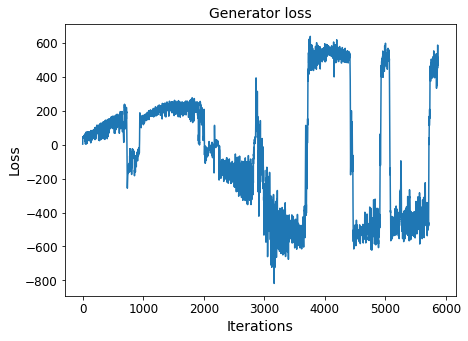

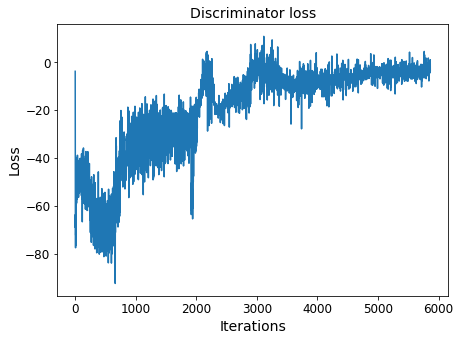

In [19]:
BATCH_SIZE = 64  # any adequate value
DIM = 128  # > 32
N_EPOCHS = 30  # > 20
CRITIC_STEPS = 4  # 1 < x < 10
POWER_ITERATIONS = 2  # 1 < x < 5
LR = 3e-4  # < 1e-3
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
print("Total number of epochs:", N_EPOCHS)

generator = ConvGenerator(n_channels=DIM)
conv_layer = partial(SpectralNormConv2D, power_iterations=POWER_ITERATIONS)
linear_layer = partial(SpectralNormLinear, power_iterations=POWER_ITERATIONS)
critic = ConvCritic(n_channels=DIM, conv_layer=conv_layer, linear_layer=linear_layer)

train_losses = train_wgan(
    generator,
    critic,
    train_loader,
    critic_steps=CRITIC_STEPS,
    batch_size=BATCH_SIZE,
    n_epochs=N_EPOCHS,
    lr=LR,
    use_cuda=USE_CUDA,
)

g_losses = train_losses["generator_losses"]
d_losses = train_losses["discriminator_losses"]

plot_losses(g_losses, "Generator loss")
plot_losses(d_losses, "Discriminator loss")

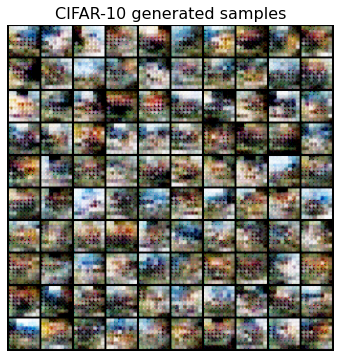

In [20]:
generator.eval()
critic.eval()
with torch.no_grad():
    samples = generator.sample(1000)
    samples = samples.cpu().detach().numpy()


show_samples(samples[:100], title="CIFAR-10 generated samples")